In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats



In [5]:
# Load the dataset
df = pd.read_csv("../data/togo-dapaong_qc.csv")

In [6]:
# check the first few rows of the dataset
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-25 00:01 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1  2021-10-25 00:02 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2  2021-10-25 00:03 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3  2021-10-25 00:04 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4  2021-10-25 00:05 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.4  227.6      1.1  977         0            0.0   24.7   24.4   
1      0.4  229.3      0.7  977         0            0.0   24.7   24.4   
2      0.3  228.5      2.9  977         0            0.0   24.7   24.4   
3      0.3  229.1      4.6  977         0            0.0   24.7   24.4   
4      0.4  227.5      1.6  977         0            0.0   24.7   24.4   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

In [7]:
# Summary Statistics & Missing-Value Report
print("Summary Statistics & Missing-Value Report:")
print()
# Overview of numeric columns
print("The description of the numeric columns:")
df.describe()

Summary Statistics & Missing-Value Report:

The description of the numeric columns:


GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25%         0.000000      24.200000      26.500000       1.400000   
50%         4.300000      27.200000      59.300000       2.200000   
75%       411.000000      31.100000      80.800000       3.200000   
max      1367.000000      41.400000      99.800000      16.100000   

              WSgust        WSstdev             WD        WDstdev  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean        3.229490       0.557740     161.741845      10.559568   
std         1.882565       0.268923      91.877217       5.915490   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.900000       0.400000      74.800000       6.900000   
50%         2.900000       0.500000     199.100000      10.800000   
75%         4.400000       0.700000     233.500000      14.100000   
max        23.100000       4.700000     360.000000      86.900000   

                  BP       Cleaning  Precipitation          TModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      975.915242       0.000535       0.001382      32.444403   
std         2.153977       0.023116       0.026350      10.998334   
min       968.000000       0.000000       0.000000      13.100000   
25%       975.000000       0.000000       0.000000      23.900000   
50%       976.000000       0.000000       0.000000      28.400000   
75%       977.000000       0.000000       0.000000      40.600000   
max       983.000000       1.000000       2.300000      70.400000   

               TModB  Comments  
count  525600.000000       0.0  
mean       33.543330       NaN  
std        12.769277       NaN  
min        13.100000       NaN  
25%        23.600000       NaN  
50%        28.400000       NaN  
75%        43.000000       NaN  
max        94.600000       NaN

In [6]:
print(df.isna().sum())

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [7]:
# Check for missing values in all columns
missing_values = df.isna().sum()
print("Missing Values per Column:")
print(missing_values)

# Identify columns with significant missing data (>5%)
threshold = len(df) * 0.05  # 5% threshold
columns_with_missing = missing_values[missing_values > threshold]
print("\nColumns with >5% Missing Values:")
print(columns_with_missing)

Missing Values per Column:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Columns with >5% Missing Values:
Comments    525600
dtype: int64


In [8]:
# Outlier Detection & Basic Cleaning
print("Outlier Detection & Basic Cleaning:")

# Define the columns to check for outliers
key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Compute Z-scores and flag outliers (|Z| > 3)
z_scores = np.abs(stats.zscore(df[key_columns]))

# Flag rows with any |Z| > 3
outlier_mask = (z_scores > 3).any(axis=1)

# Show number of outliers
print(f"Number of outlier rows: {outlier_mask.sum()}")


Outlier Detection & Basic Cleaning:
Number of outlier rows: 9251


In [9]:
# drop outliers
print("Dropping outliers...")
df = df[~outlier_mask]

Dropping outliers...


In [10]:
# normalize the negative data to zero

# checking the rows with invalid values (irradiance targeted)
irradiance_cols = ["GHI", "DNI", "DHI", "ModA", "ModB"]

for col in irradiance_cols:
    invalid_count = (df[col] < 0).sum()
    print(f"{col}: {invalid_count} invalid values (< 0)")

print("Normalizing negative values to zero...")
# For each column, if the value is negative, we will
# change them to zero
for col in irradiance_cols:
    df[col] = df[col].clip(lower=0)

GHI: 255872 invalid values (< 0)
DNI: 0 invalid values (< 0)
DHI: 0 invalid values (< 0)
ModA: 0 invalid values (< 0)
ModB: 0 invalid values (< 0)
Normalizing negative values to zero...


In [12]:
# save the cleaned data
print("Saving the cleaned data...")
country = "benin"  # change accordingly
output_path = f"../data/togo-dapaong_clean.csv"
df.to_csv(output_path, index=False)
print(f"Cleaned data exported to: {output_path}")

Saving the cleaned data...
Cleaned data exported to: ../data/togo-dapaong_clean.csv


In [13]:
# Time Series Analysis
print("Time Series Analysis:")

# Convert 'Timestamp' to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%Y-%m-%d %H:%M')

# Set 'Timestamp' as index
df.set_index('Timestamp', inplace=True)

Time Series Analysis:


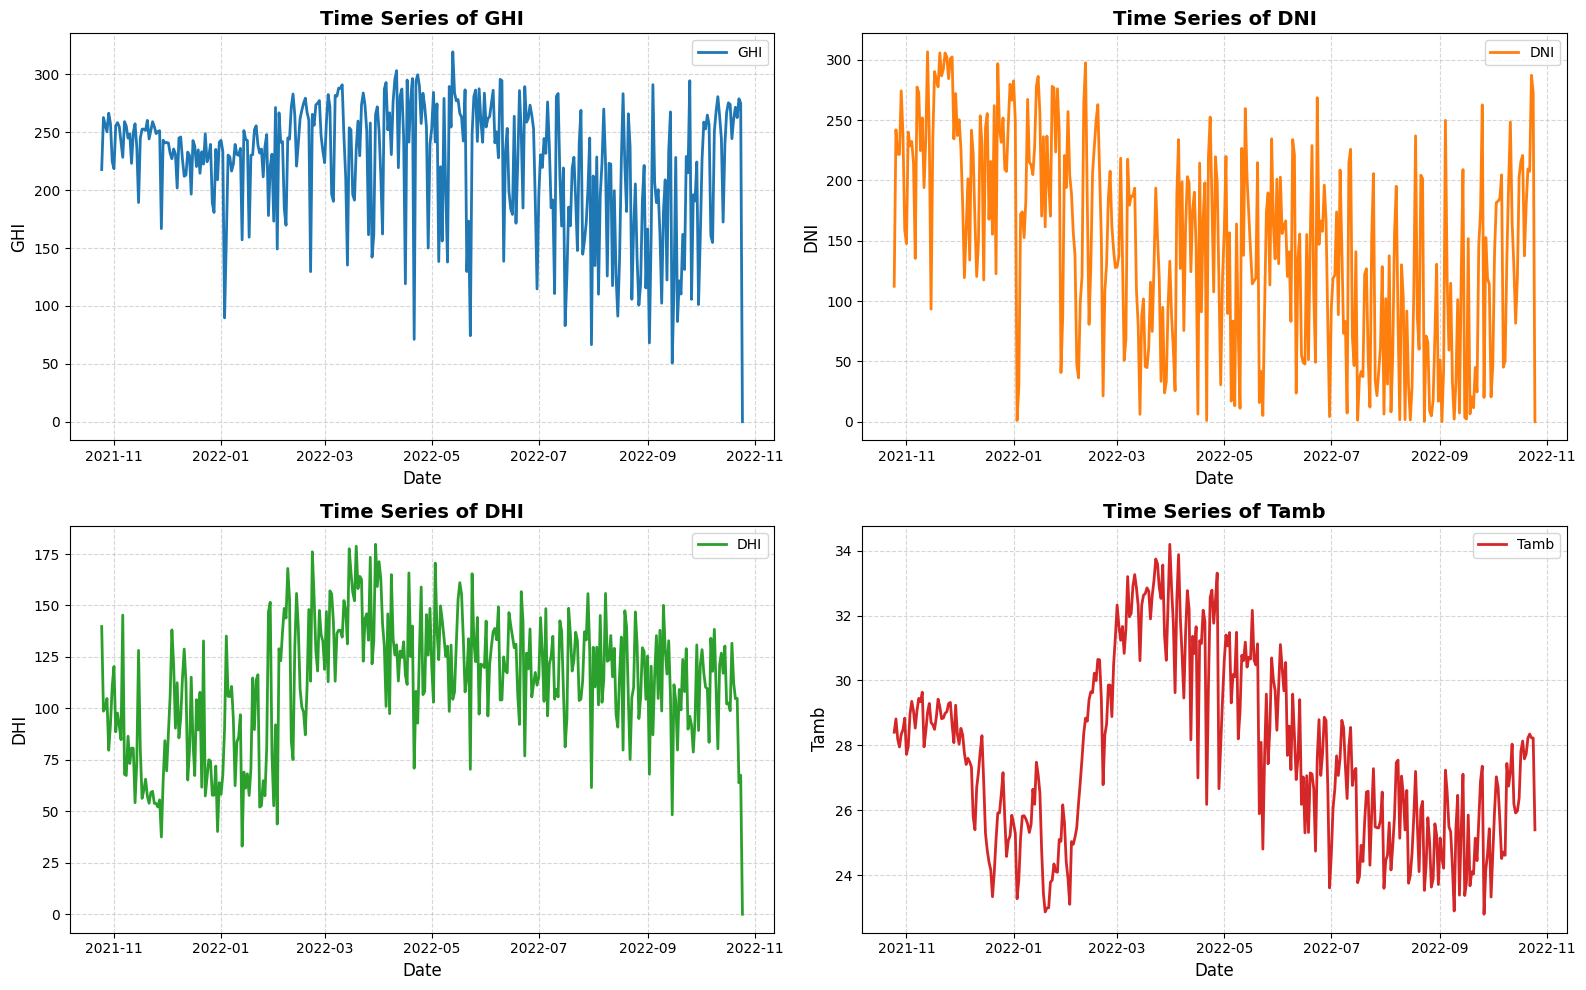

In [15]:
import matplotlib.pyplot as plt

# Define the columns to plot
columns = ['GHI', 'DNI', 'DHI', 'Tamb']

# Improved color palette (custom and distinct)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # blue, orange, green, red

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 10))
axs = axs.flatten()

# Resample the dataframe to daily averages and fill missing values
sampled_df = df.resample('D').mean().ffill()

# Plot each column in a separate plot
for i in range(len(columns)):
    col = columns[i]
    axs[i].plot(sampled_df.index, sampled_df[col], 
                label=col, 
                color=colors[i], 
                linewidth=2, 
                linestyle='-')
    
    axs[i].set_title(f'Time Series of {col}', fontsize=14, fontweight='bold')
    axs[i].set_xlabel('Date', fontsize=12)
    axs[i].set_ylabel(col, fontsize=12)
    axs[i].grid(True, linestyle='--', alpha=0.5)
    axs[i].legend(fontsize=10)

# Adjust layout for spacing
plt.tight_layout()
plt.show()


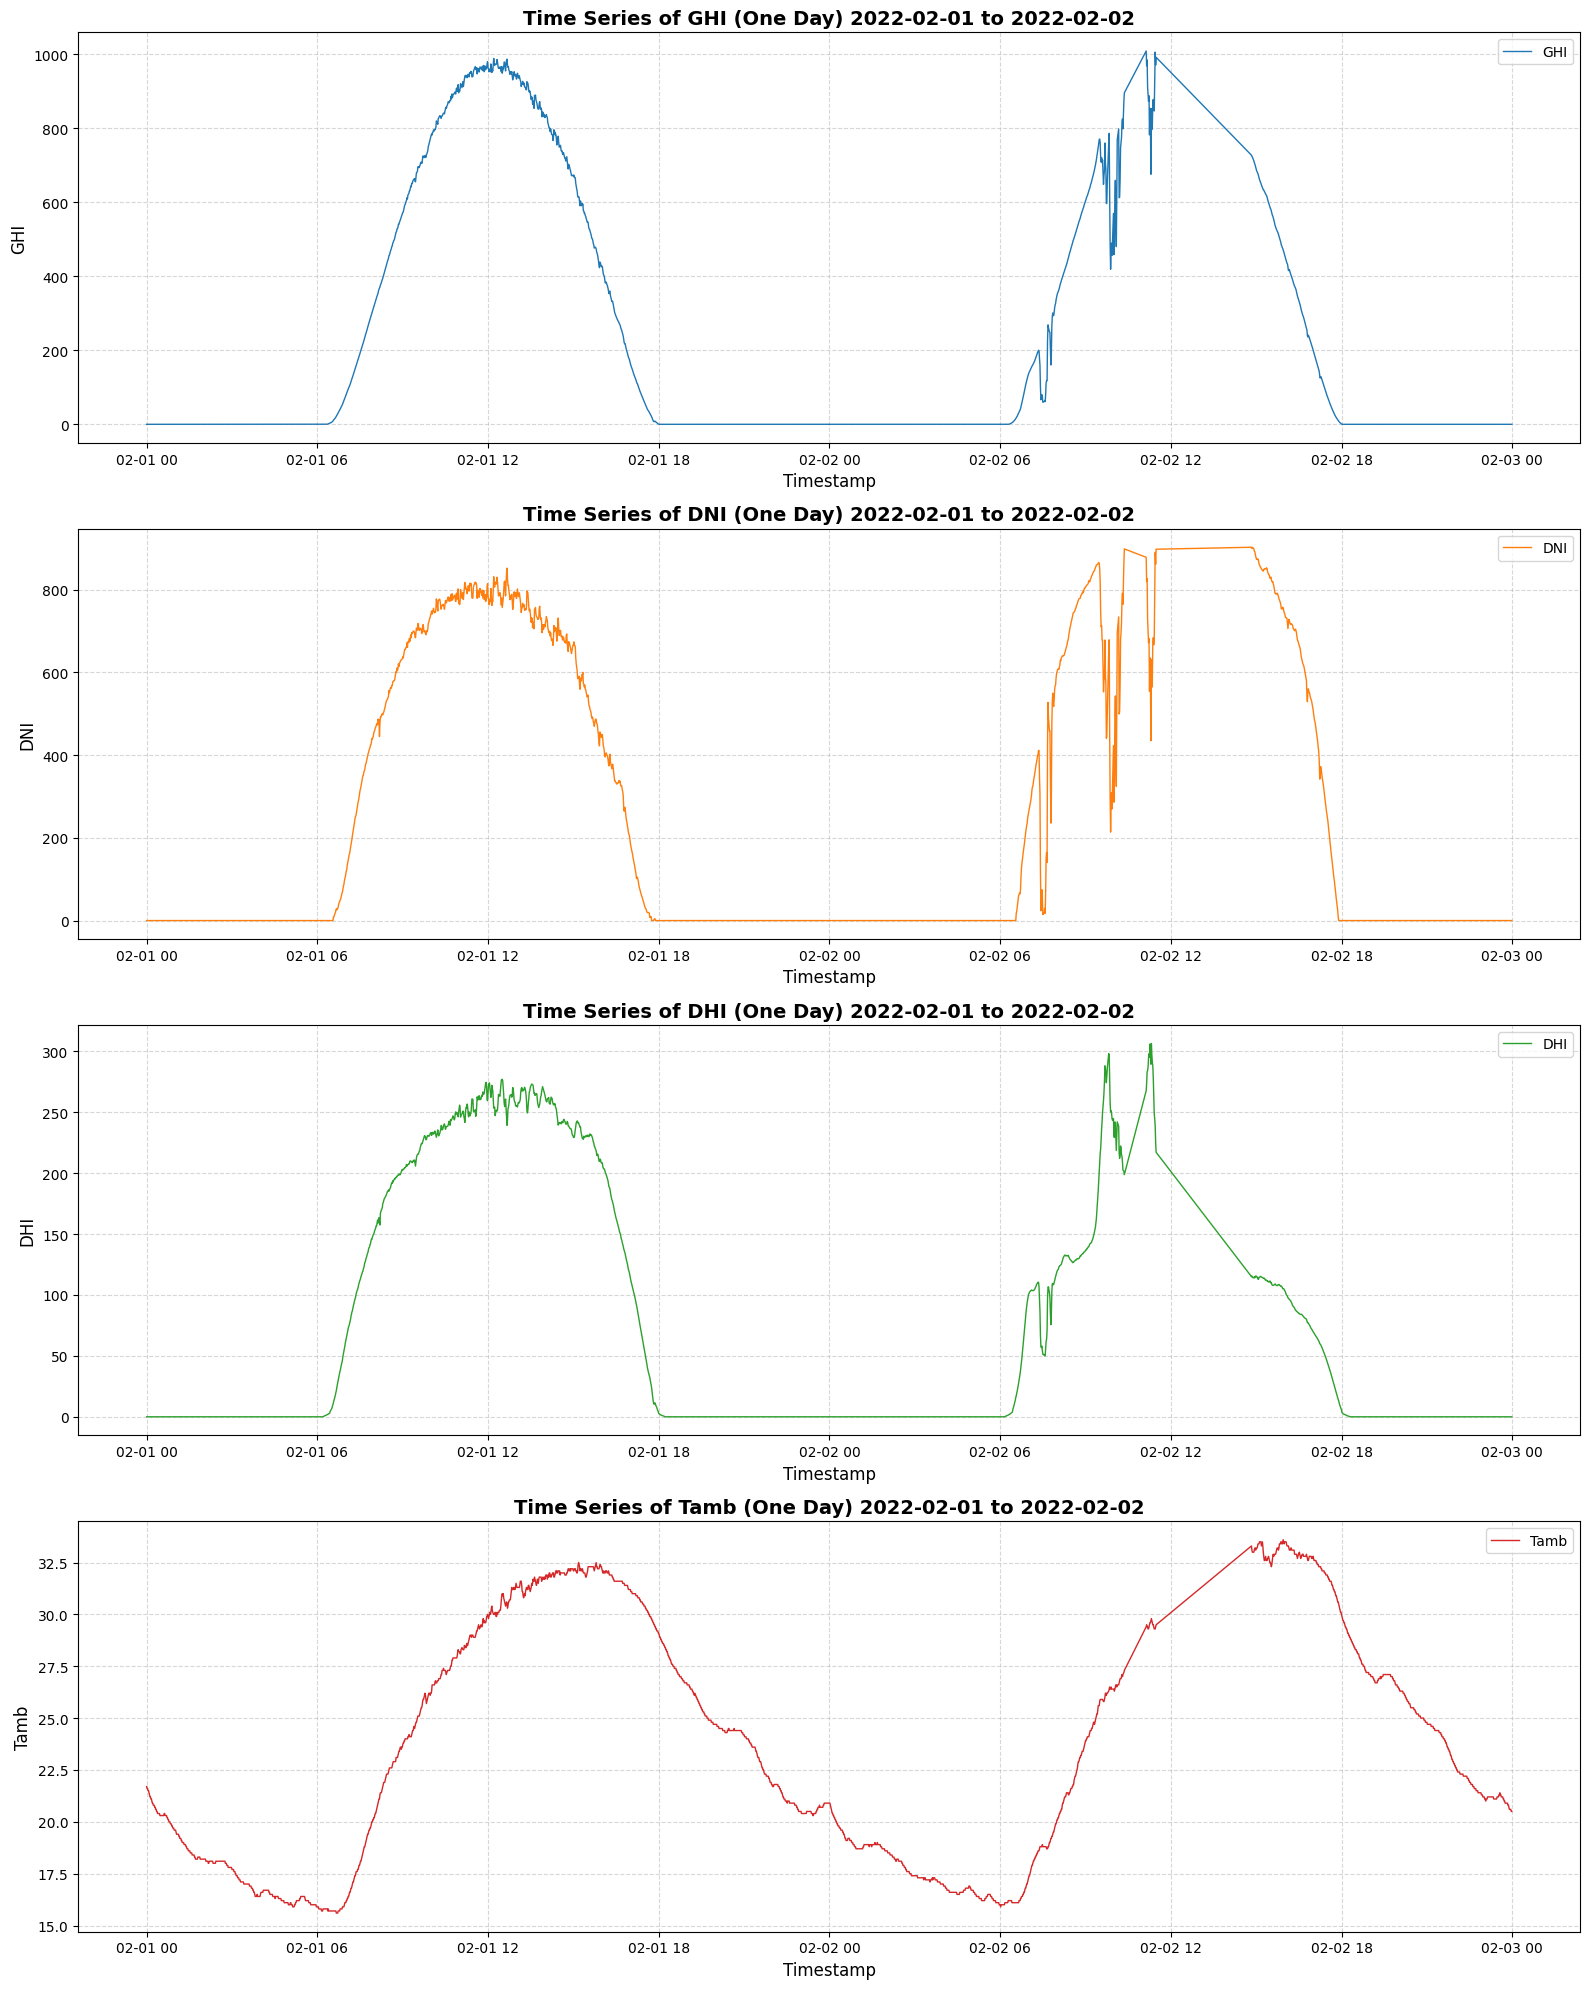

In [16]:
# Define the one-day data range
one_day = df.loc['2022-02-01':'2022-02-02']

# Create subplots
fig, axs = plt.subplots(4, 1, figsize=(16, 20))
axs = axs.flatten()

# Plot each selected column
for i in range(len(columns)):
    col = columns[i]
    axs[i].plot(
        one_day.index, 
        one_day[col], 
        label=col, 
        color=colors[i], 
        linewidth=1  # Thin line
    )
    axs[i].set_title(f'Time Series of {col} (One Day) 2022-02-01 to 2022-02-02', fontsize=14, fontweight='bold')
    axs[i].set_xlabel('Timestamp', fontsize=12)
    axs[i].set_ylabel(col, fontsize=12)
    axs[i].grid(True, linestyle='--', alpha=0.5)
    axs[i].legend(fontsize=10)

# Final layout adjustment
plt.tight_layout()
plt.show()


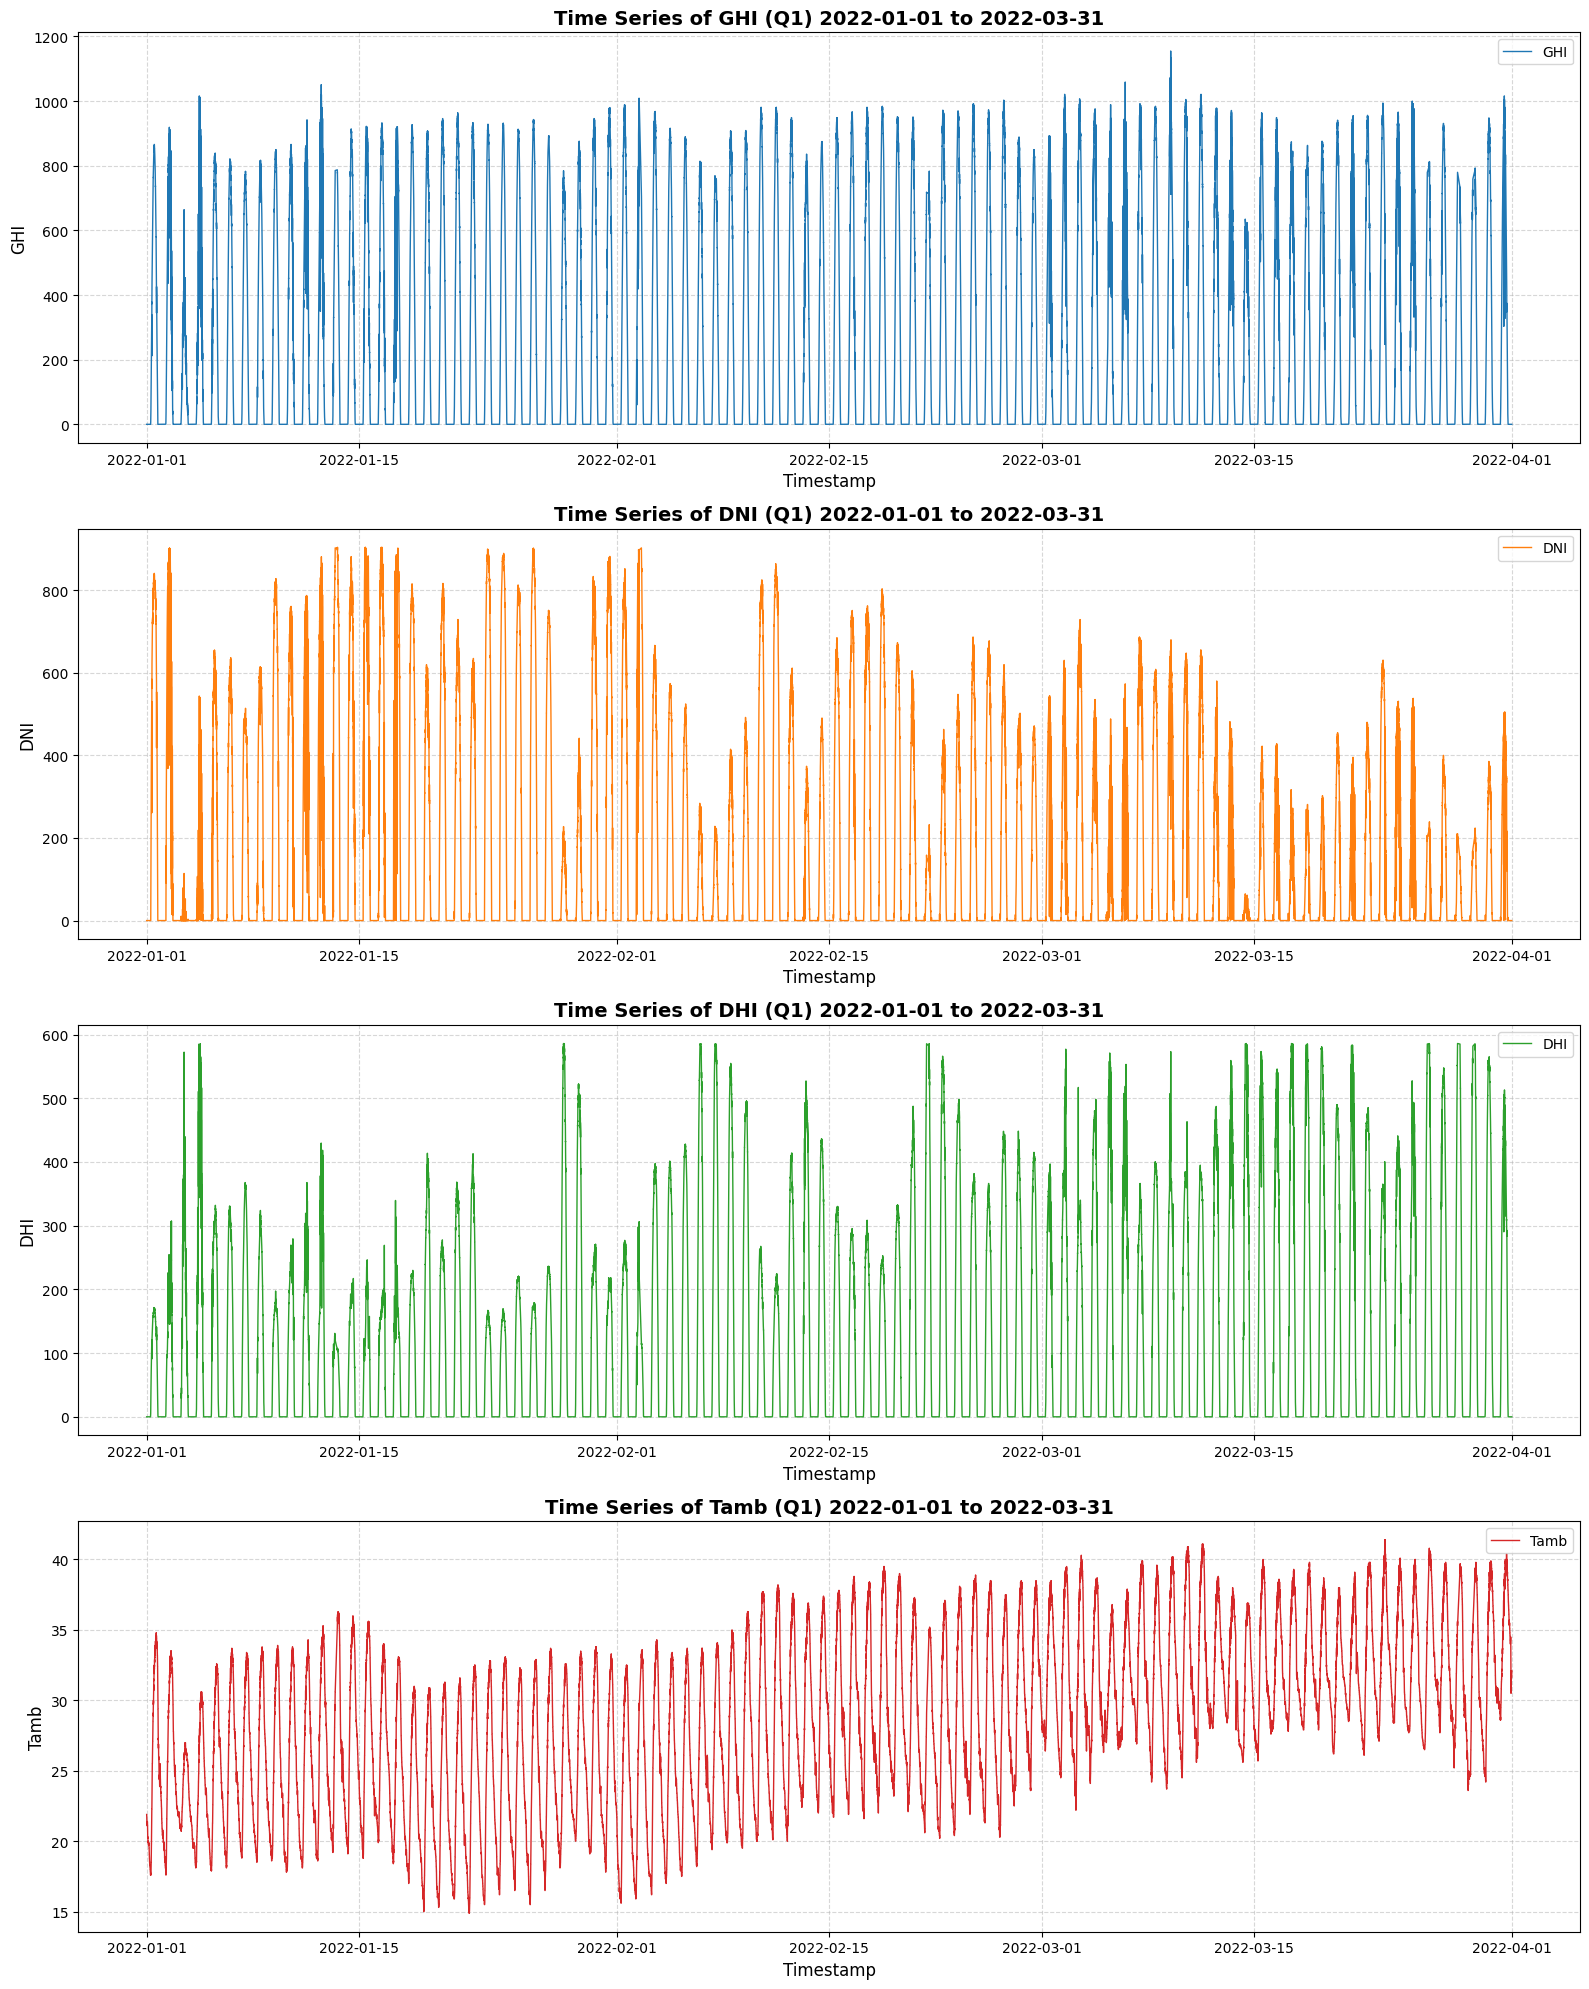

In [17]:
# One quartile year data: Q1 2022
one_quartile = df.loc['2022-01-01':'2022-03-31']

# Create subplots
fig, axs = plt.subplots(4, 1, figsize=(16, 20))
axs = axs.flatten()

# Plot each column
for i in range(len(columns)):
    col = columns[i]
    axs[i].plot(
        one_quartile.index, 
        one_quartile[col], 
        label=col, 
        color=colors[i], 
        linewidth=1  # Thin line
    )
    axs[i].set_title(f'Time Series of {col} (Q1) 2022-01-01 to 2022-03-31', fontsize=14, fontweight='bold')
    axs[i].set_xlabel('Timestamp', fontsize=12)
    axs[i].set_ylabel(col, fontsize=12)
    axs[i].grid(True, linestyle='--', alpha=0.5)
    axs[i].legend(fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()


Average ModA and ModB by Cleaning Status:
                ModA        ModB
Cleaning                        
0         219.217037  212.861920
1         528.864835  527.268498


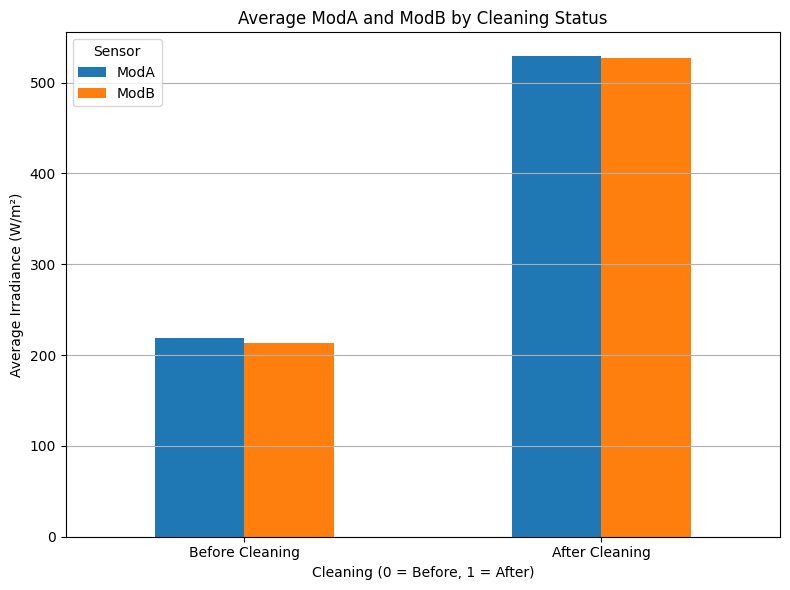

In [18]:
# Group by 'Cleaning' flag and compute mean for ModA and ModB
mod_means = df.groupby('Cleaning')[['ModA', 'ModB']].mean()

# Print the means
print("Average ModA and ModB by Cleaning Status:")
print(mod_means)

# Plot as bar chart
mod_means.plot(kind='bar', figsize=(8, 6), color=['#1f77b4', '#ff7f0e'])
plt.title('Average ModA and ModB by Cleaning Status')
plt.xlabel('Cleaning (0 = Before, 1 = After)')
plt.ylabel('Average Irradiance (W/m²)')
plt.xticks(ticks=[0, 1], labels=['Before Cleaning', 'After Cleaning'], rotation=0)
plt.grid(axis='y')
plt.legend(title='Sensor')
plt.tight_layout()
plt.show()

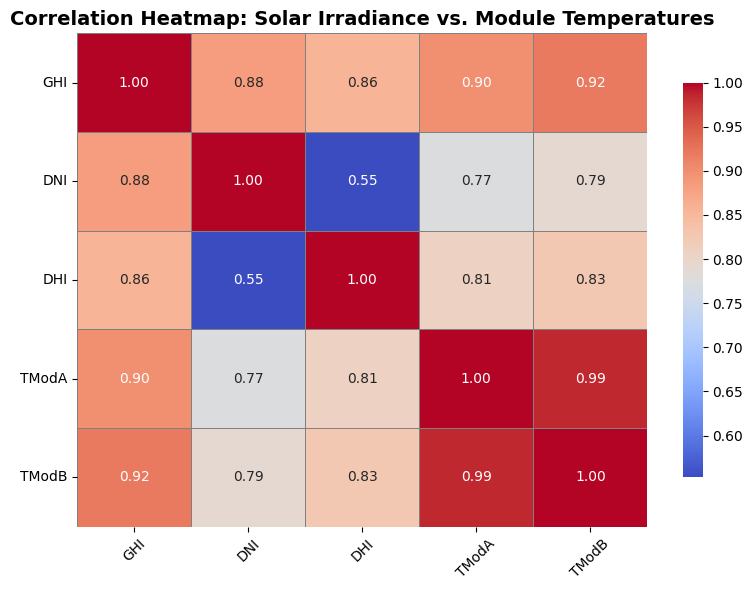

In [19]:
# Select relevant columns for correlation
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr_matrix = df[corr_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap='coolwarm', 
    fmt=".2f", 
    linewidths=0.5, 
    linecolor='gray',
    cbar_kws={"shrink": 0.8}
)
plt.title('Correlation Heatmap: Solar Irradiance vs. Module Temperatures', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Scatter Plots of selected pairs:


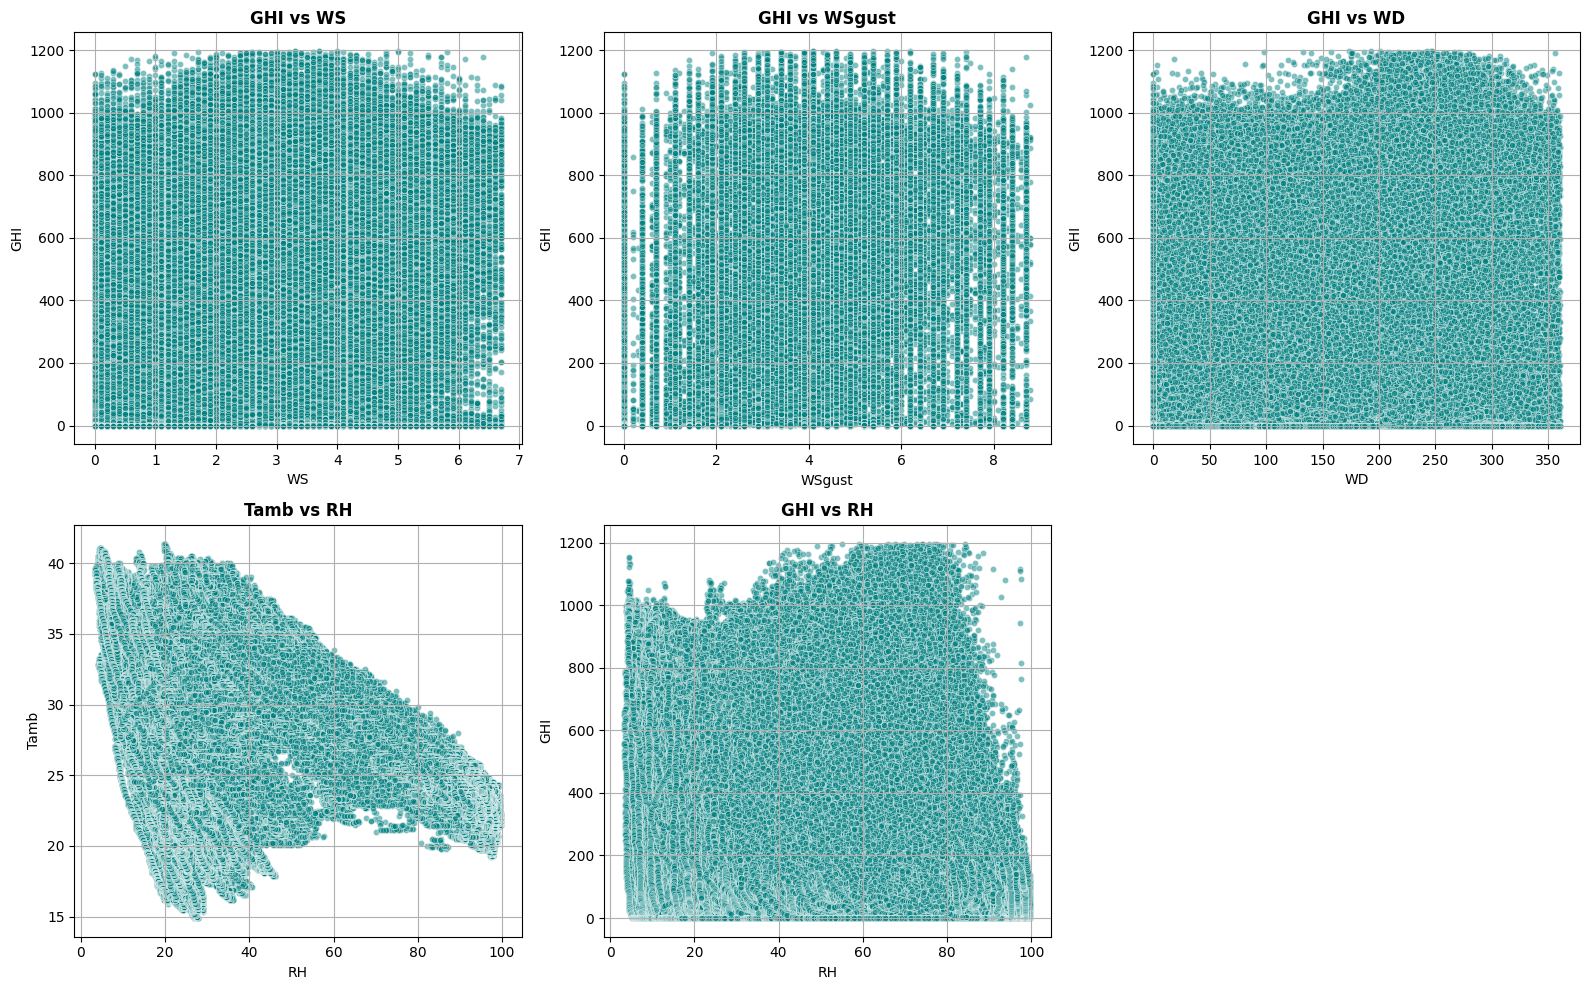

In [20]:
# Scatter Plots of selected pairs
print("Scatter Plots of selected pairs:")

# Define pairs of columns to scatter plot
scatter_pairs = [
    ('WS', 'GHI'),
    ('WSgust', 'GHI'),
    ('WD', 'GHI'),
    ('RH', 'Tamb'),
    ('RH', 'GHI')
]

# Create 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

# Loop through each pair and create scatter plot
for i, (x, y) in enumerate(scatter_pairs):
    sns.scatterplot(data=df, x=x, y=y, ax=axes[i], alpha=0.5, s=20, color='teal', edgecolor='white', linewidth=0.5)
    axes[i].set_title(f'{y} vs {x}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(x, fontsize=10)
    axes[i].set_ylabel(y, fontsize=10)
    axes[i].grid(True)

# Hide any unused subplot (6th if only 5 plots)
if len(scatter_pairs) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


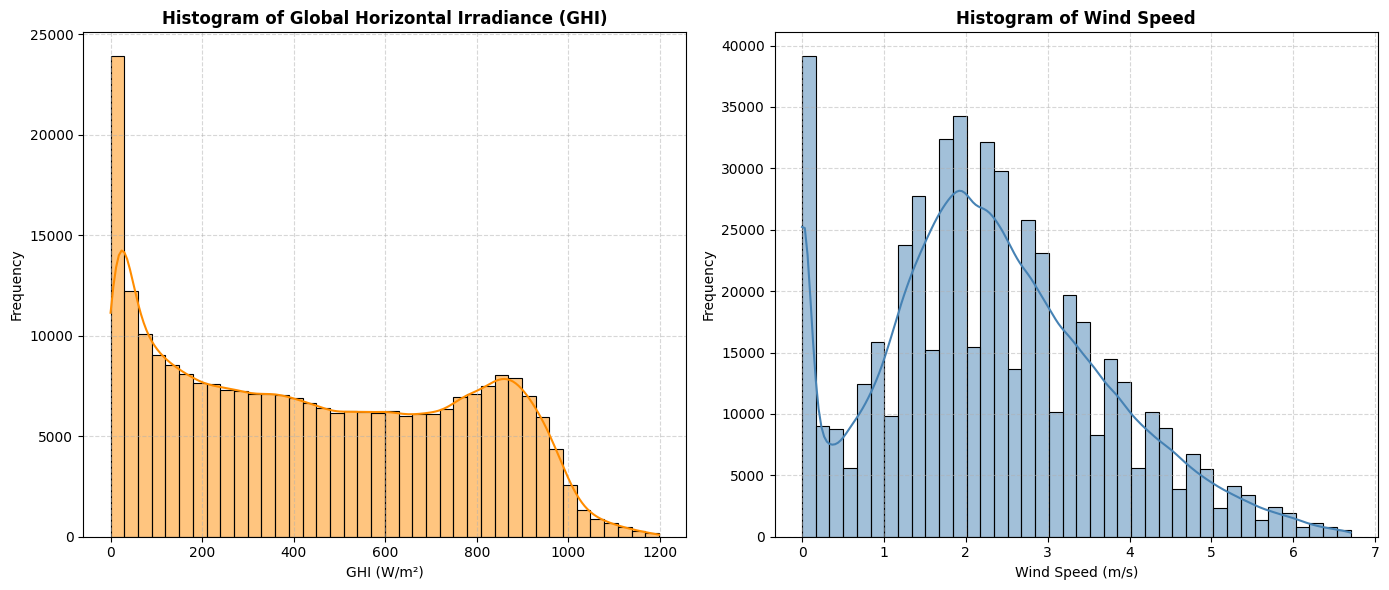

In [21]:
# Histograms of GHI and Wind Speed

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Remove zeros from GHI
curated_ghi = df['GHI'].replace(0, np.nan).dropna()

# Plot histogram for GHI
sns.histplot(curated_ghi, bins=40, kde=True, ax=axes[0], color='darkorange', edgecolor='black')
axes[0].set_title("Histogram of Global Horizontal Irradiance (GHI)", fontsize=12, fontweight='bold')
axes[0].set_xlabel("GHI (W/m²)", fontsize=10)
axes[0].set_ylabel("Frequency", fontsize=10)
axes[0].grid(True, linestyle='--', alpha=0.5)

# Plot histogram for Wind Speed
sns.histplot(df['WS'], bins=40, kde=True, ax=axes[1], color='steelblue', edgecolor='black')
axes[1].set_title("Histogram of Wind Speed", fontsize=12, fontweight='bold')
axes[1].set_xlabel("Wind Speed (m/s)", fontsize=10)
axes[1].set_ylabel("Frequency", fontsize=10)
axes[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


Windrose plot for wind speed and direction:


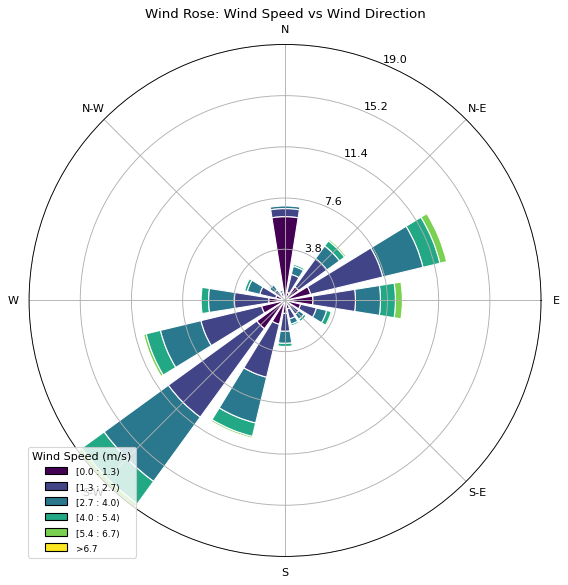

In [22]:
# windrose plot for wind speed and direction
print("Windrose plot for wind speed and direction:")

from windrose import WindroseAxes
# Create Windrose plot
wind_data = df[['WS', 'WD']]
ax = WindroseAxes.from_ax()
ax.bar(wind_data['WD'], wind_data['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend(title="Wind Speed (m/s)")
plt.title("Wind Rose: Wind Speed vs Wind Direction")
plt.show()


Effect of RH on Temperature and GHI:


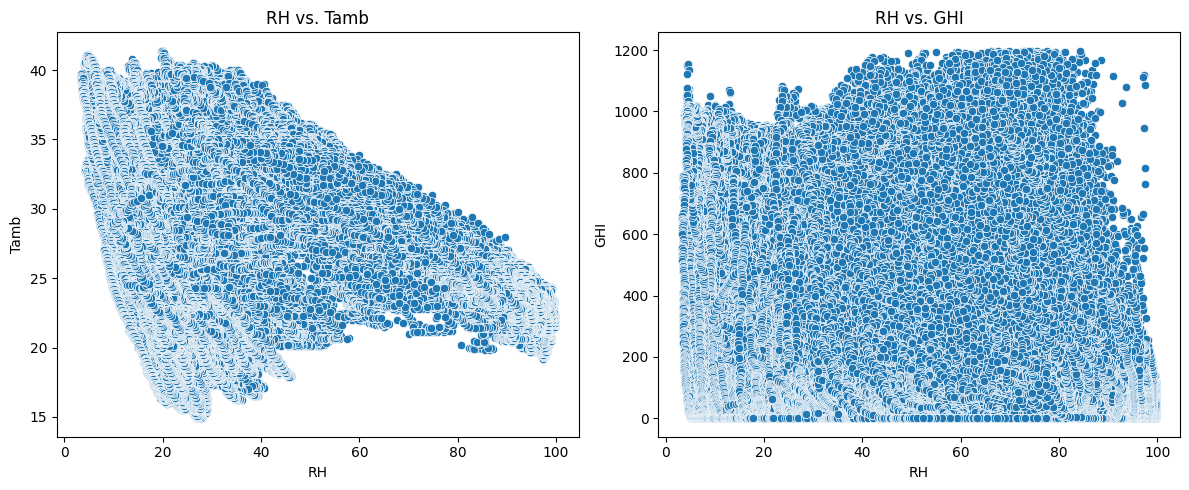

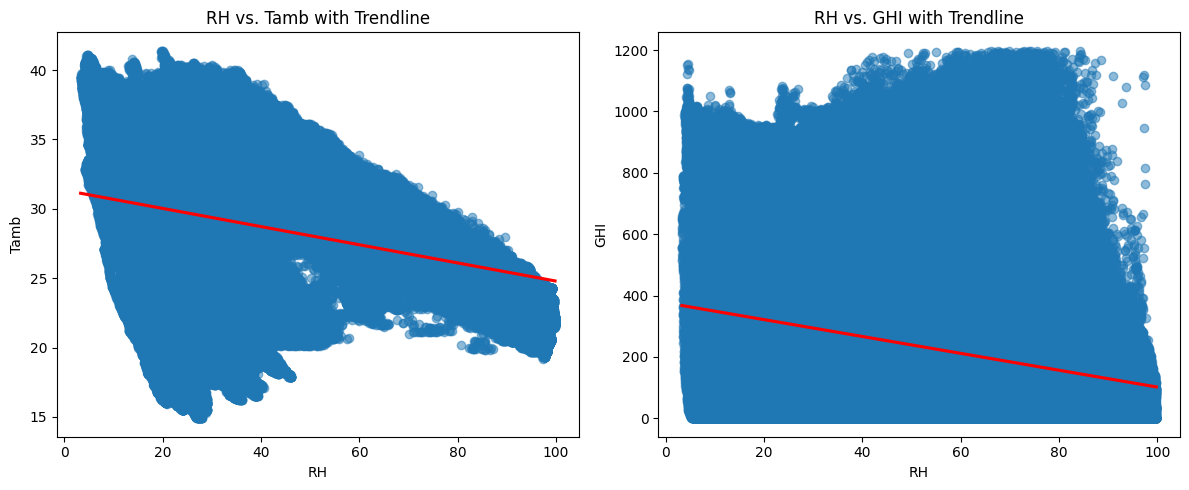

In [24]:
# Effect of RH on Temperature and GHI
print("Effect of RH on Temperature and GHI:")

# Scatter plots of RH vs Tamb and GHI
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(x='RH', y='Tamb', data=df, ax=axs[0])
axs[0].set_title('RH vs. Tamb')

sns.scatterplot(x='RH', y='GHI', data=df, ax=axs[1])
axs[1].set_title('RH vs. GHI')

plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# trendline for RH vs Tamb
sns.regplot(x='RH', y='Tamb', data=df, ax=axs[0], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
axs[0].set_title('RH vs. Tamb with Trendline')

# trendline for RH vs GHI
sns.regplot(x='RH', y='GHI', data=df, ax=axs[1], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
axs[1].set_title('RH vs. GHI with Trendline')

plt.tight_layout()
plt.show()


Bubble chart of GHI vs Tamb with bubble size as RH:


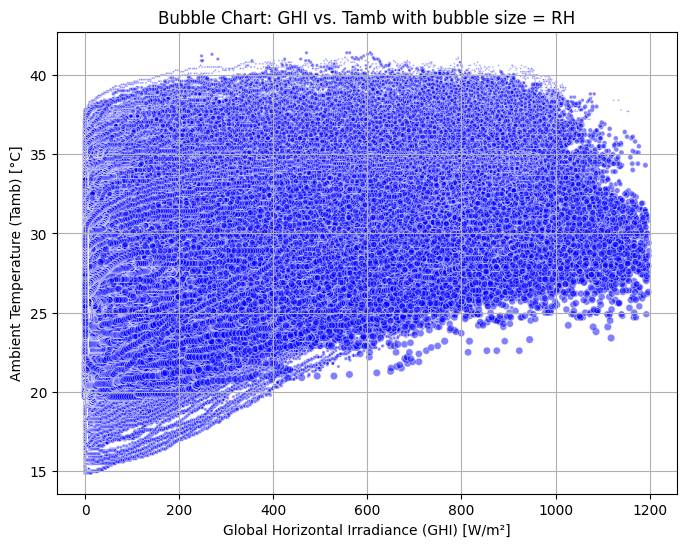

In [25]:
# bubble chart of GHI vs Tamb with bubble size as RH
print("Bubble chart of GHI vs Tamb with bubble size as RH:")
plt.figure(figsize=(8,6))

# Choose bubble size variable: 'RH' or 'BP'
bubble_size = df['RH']  # or df['BP']

# Scale bubble sizes for better visualization
sizes = bubble_size / bubble_size.max() * 30  # adjust multiplier as needed

plt.scatter(df['GHI'], df['Tamb'], s=sizes, alpha=0.5, c='blue', edgecolors='w', linewidth=0.5)

plt.xlabel('Global Horizontal Irradiance (GHI) [W/m²]')
plt.ylabel('Ambient Temperature (Tamb) [°C]')
plt.title('Bubble Chart: GHI vs. Tamb with bubble size = RH')

plt.grid(True)
plt.show()
